# **AI COMPANIES GROWTH & STOCK RETURN - EDA**

# **DATABASE DOWNLOAD AND TREATMENT**

In [2]:
!pip install -q kagglehub

In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("rohitgrewal/ai-financial-and-market-data")

complete_path = os.path.join(path, "ai_financial_market_daily_realistic_synthetic.csv")

In [4]:
df = pd.read_csv(complete_path)
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


*   **Column 'Event' has NaNs**

In [5]:
df.isnull().sum()

,0
Date,0
Company,0
R&D_Spending_USD_Mn,0
AI_Revenue_USD_Mn,0
AI_Revenue_Growth_%,0
Event,10726
Stock_Impact_%,0


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
df['Event'] = df['Event'].fillna("No Event")

In [8]:
print(df.dtypes)

Date                   datetime64[ns]
Company                        object
R&D_Spending_USD_Mn           float64
AI_Revenue_USD_Mn             float64
AI_Revenue_Growth_%           float64
Event                          object
Stock_Impact_%                float64
dtype: object


In [9]:
numeric_cols = ['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn', 'AI_Revenue_Growth_%', 'Stock_Impact_%']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [10]:
print(df.duplicated().sum())

0


In [11]:
df.columns = df.columns.str.lower()

In [12]:
df.to_csv("ai_financial_market_clean.csv", index=False)

In [13]:
df.head()

,date,company,r&d_spending_usd_mn,ai_revenue_usd_mn,ai_revenue_growth_%,event,stock_impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,No Event,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,No Event,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,No Event,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,No Event,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,No Event,-0.09


In [14]:
print(df['company'].value_counts())

company
OpenAI    3653
Google    3653
Meta      3653
Name: count, dtype: int64


*   **3 companies**

In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [73]:
df.head()

,date,company,r&d_spending_usd_mn,ai_revenue_usd_mn,ai_revenue_growth_%,event,stock_impact_%,year,month,event_group
0,2015-01-01,OpenAI,5.92,0.63,-36.82,No Event,-0.36,2015,1,None
1,2015-01-02,OpenAI,5.41,1.81,80.59,No Event,0.41,2015,1,None
2,2015-01-03,OpenAI,4.50,0.61,-38.88,No Event,0.23,2015,1,None
3,2015-01-04,OpenAI,5.45,0.95,-5.34,No Event,0.93,2015,1,None
4,2015-01-05,OpenAI,3.40,1.48,48.45,No Event,-0.09,2015,1,None


# **EXPLORATORY ECONOMETRIC ANALYSIS**

In [16]:
print(df['event'].value_counts())

event
No Event                           10726
AI speech recognition release         37
AI Ads Optimization upgrade           32
AI partnership deal                   32
AI-powered search update              32
AI Video Recommendation upgrade       29
AI ethics policy update               27
Cloud AI launch                       27
GPT-1 release                          1
GPT-2 release                          1
GPT-3 release                          1
Codex release                          1
DALL·E 2 release                       1
ChatGPT (GPT-3.5) launch               1
GPT-4 release                          1
GPT-5 release (predicted)              1
TensorFlow open-source release         1
AlphaGo beats Lee Sedol                1
BERT for Search launch                 1
MUM Search Model launch                1
Bard chatbot launch                    1
Gemini AI release                      1
LLaMA 1 release                        1
LLaMA 2 release                        1
LLaMA 3 re

*   **There are few events**

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,10959,2020-01-01 00:00:00.000000256,2015-01-01 00:00:00,2017-07-02 00:00:00,2020-01-01 00:00:00,2022-07-02 00:00:00,2024-12-31 00:00:00,NaN
r&d_spending_usd_mn,10959.0,65.184504,1.57,8.64,70.96,99.6,163.83,47.918247
ai_revenue_usd_mn,10959.0,44.126571,-0.55,3.61,35.22,71.68,155.96,41.639356
ai_revenue_growth_%,10959.0,159.395988,-155.43,43.87,133.75,258.3,565.5,135.462185
stock_impact_%,10959.0,0.02556,-3.0,-0.5,0.0,0.51,18.5,0.749513
year,10959.0,2019.500411,2015.0,2017.0,2020.0,2022.0,2024.0,2.872794
month,10959.0,6.52231,1.0,4.0,7.0,10.0,12.0,3.44903




*   **Date range 2025-2024**
*   **Stock impact range -0.3% to 18.5%**
*   **Revenue growth range -155 to 258**


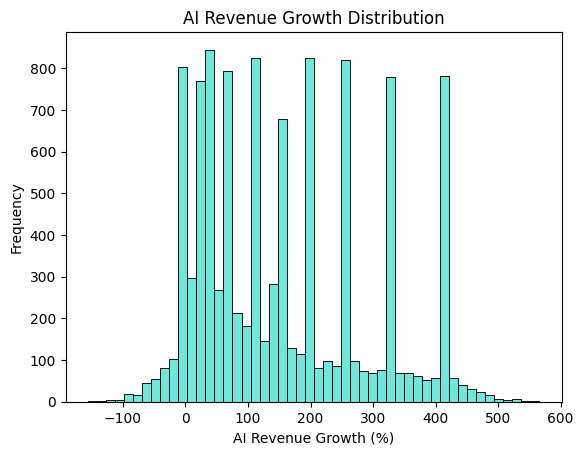

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['ai_revenue_growth_%'], bins=50, color='turquoise')
plt.title("AI Revenue Growth Distribution")
plt.xlabel("AI Revenue Growth (%)")
plt.ylabel("Frequency")
plt.show()


*   **Range: -100 to 600, indicates high volatility, losses can be significant, growth can be outstanding**
*   **Growth concentration: 0 to 100**
*   **Right skewed: most companies have moderate growth**



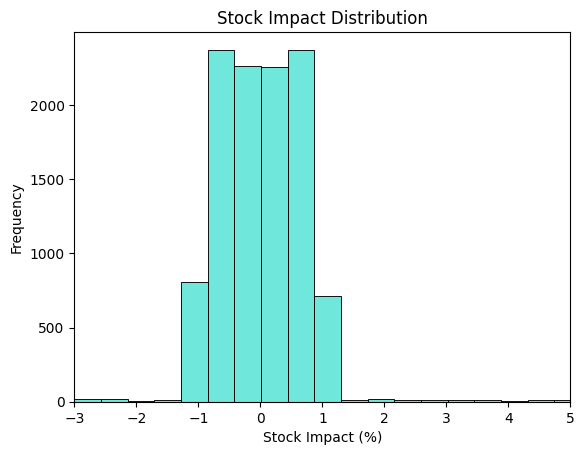

In [19]:
sns.histplot(df['stock_impact_%'], bins=50, color='turquoise')
plt.title("Stock Impact Distribution")
plt.xlabel("Stock Impact (%)")
plt.ylabel("Frequency")
plt.xlim(-3, 5)
plt.show()



*   **Stock impact concentrated between -1 and 1, other values are outliers**



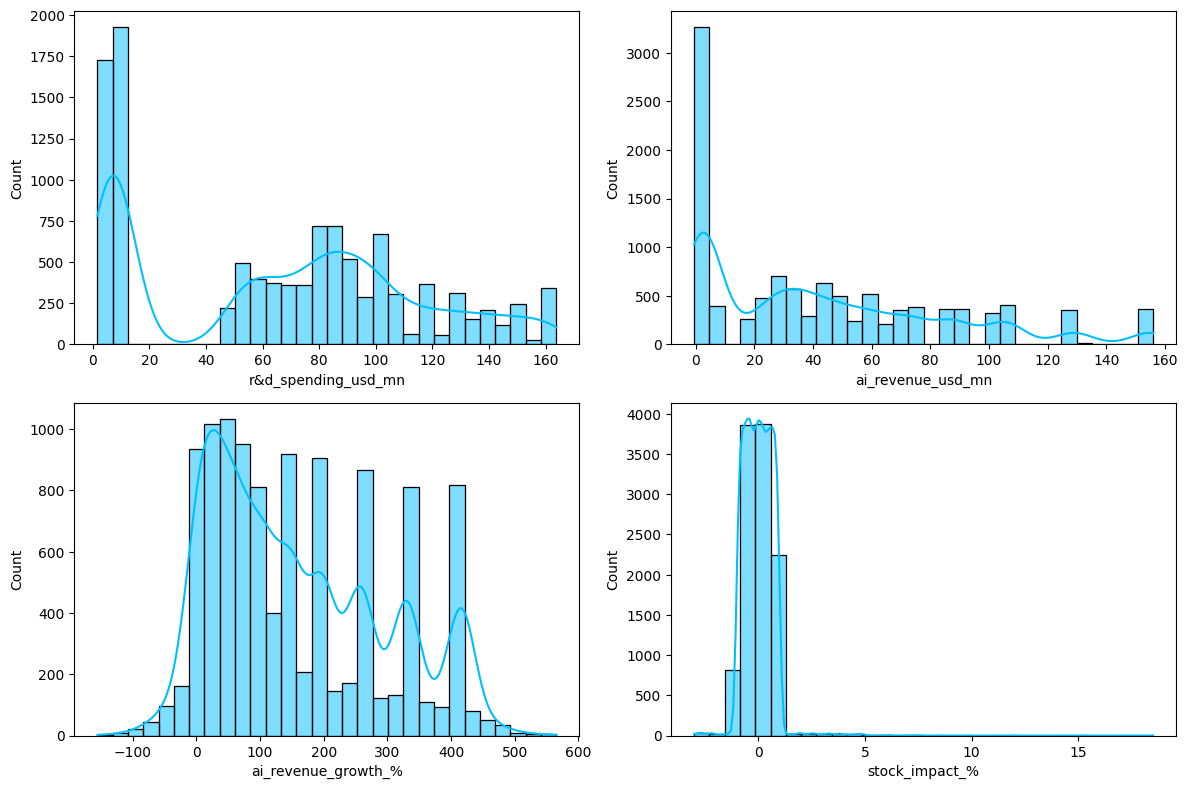

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['r&d_spending_usd_mn'], bins=30, ax=axs[0, 0], color='deepskyblue', kde=True)
sns.histplot(df['ai_revenue_usd_mn'], bins=30, ax=axs[0, 1], color='deepskyblue', kde=True)
sns.histplot(df['ai_revenue_growth_%'], bins=30, ax=axs[1, 0], color='deepskyblue', kde=True)
sns.histplot(df['stock_impact_%'], bins=30, ax=axs[1, 1], color='deepskyblue', kde=True)
plt.tight_layout()
plt.show()



*   **Most spending range from 0 to 20, higher spending is much less frequent**
*   **Lower ai revenue more frequent**


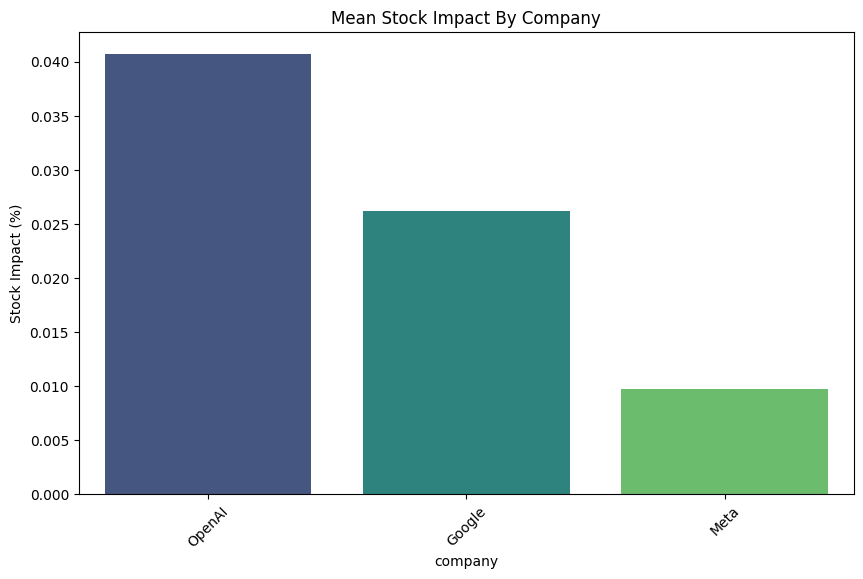

In [21]:
growth_by_company = df.groupby('company')['stock_impact_%'].mean().reset_index()

growth_by_company = growth_by_company.sort_values(by='stock_impact_%', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=growth_by_company,
    x='company',
    y='stock_impact_%',
    hue='company',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Mean Stock Impact By Company")
plt.ylabel("Stock Impact (%)")
plt.xticks(rotation=45)
plt.show()



*   **OpenAI most volatile company**



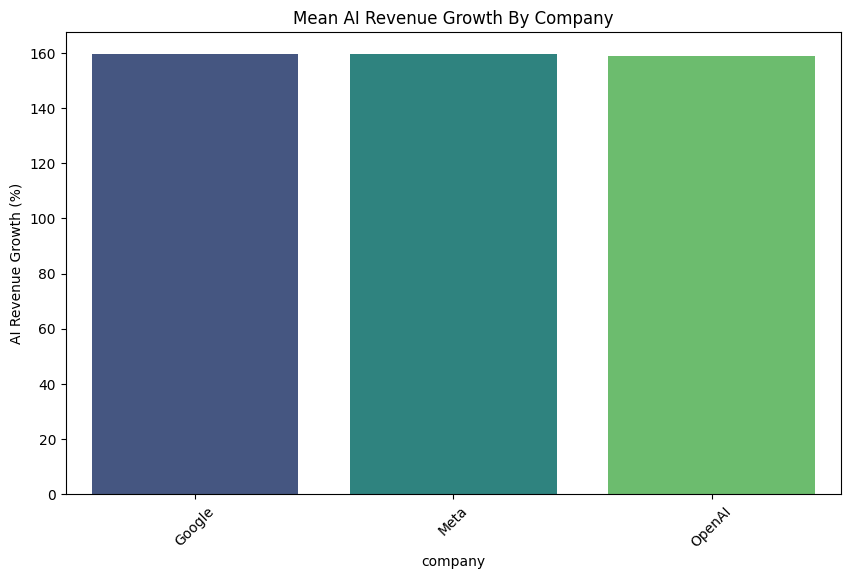

In [22]:
growth_by_company = df.groupby('company')['ai_revenue_growth_%'].mean().reset_index()

growth_by_company = growth_by_company.sort_values(by='ai_revenue_growth_%', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=growth_by_company,
    x='company',
    y='ai_revenue_growth_%',
    hue='company',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Mean AI Revenue Growth By Company")
plt.ylabel("AI Revenue Growth (%)")
plt.xticks(rotation=45)
plt.show()



*   **AI revenue growth steady for all 3 companies**



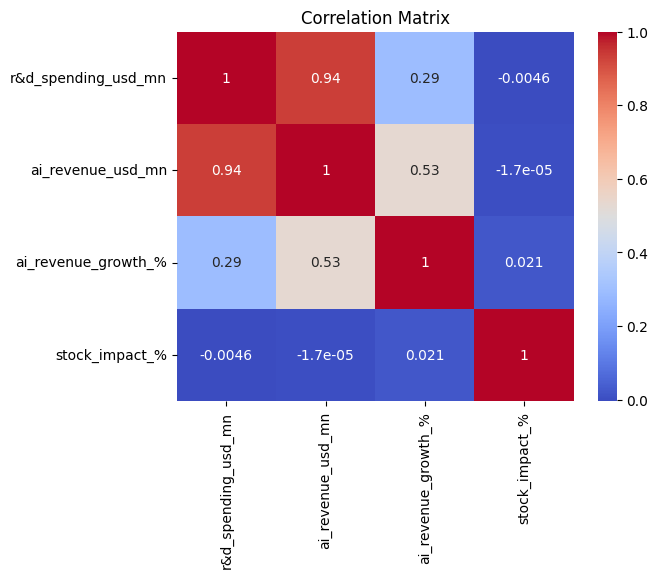

In [23]:
correlation = df[['r&d_spending_usd_mn', 'ai_revenue_usd_mn', 'ai_revenue_growth_%', 'stock_impact_%']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



*   **High correlation (0.94) between r&d spending and ai revenue**



/tmp/ipython-input-236241672.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby(pd.Grouper(key='date', freq='M')).agg({


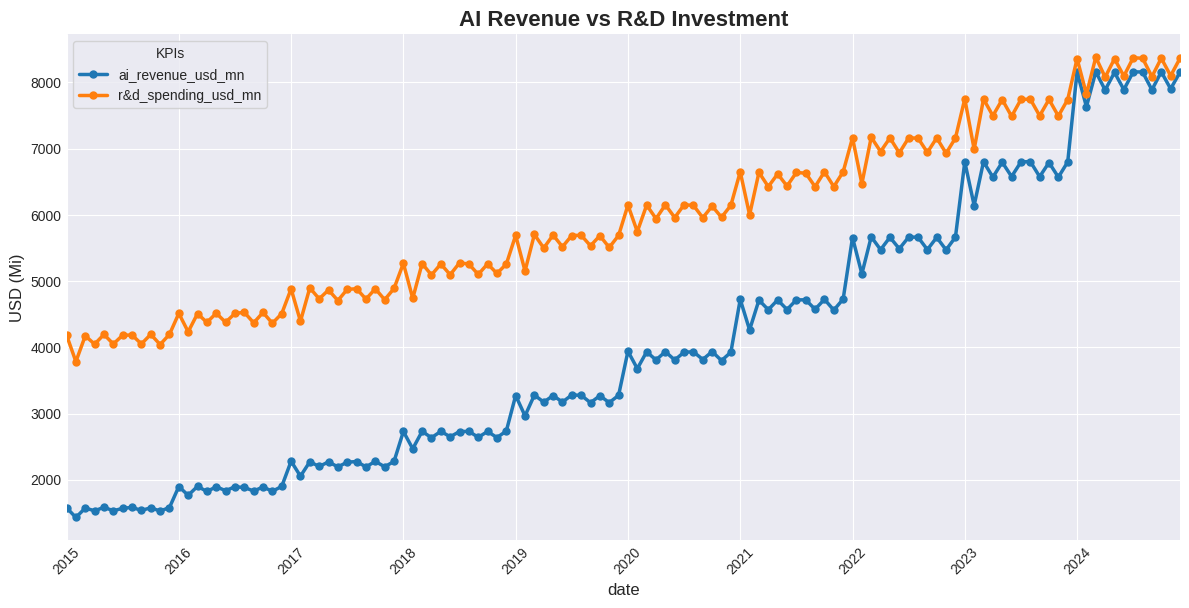

In [24]:
df_monthly = df.groupby(pd.Grouper(key='date', freq='M')).agg({
    'ai_revenue_usd_mn': 'sum',
    'r&d_spending_usd_mn': 'sum'
})

plt.style.use('seaborn-v0_8-darkgrid')

ax = df_monthly.plot(
    figsize=(12, 6),
    linewidth=2.5,
    color=['#1f77b4', '#ff7f0e'],
    marker='o',
    markersize=5
)

plt.title("AI Revenue vs R&D Investment", fontsize=16, fontweight='bold')
plt.xlabel("date", fontsize=12)
plt.ylabel("USD (Mi)", fontsize=12)

plt.legend(title="KPIs", frameon=True)

plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

In [25]:
cor_by_company = df.groupby('company')[['r&d_spending_usd_mn', 'ai_revenue_growth_%']].corr().iloc[0::2,-1]
print('\nCorrelation by', cor_by_company)


Correlation by company                     
Google   r&d_spending_usd_mn    0.991085
Meta     r&d_spending_usd_mn    0.989564
OpenAI   r&d_spending_usd_mn    0.779192
Name: ai_revenue_growth_%, dtype: float64




*   **OpenAI is more volatile, but Google and Meta benefit more frm R&D spending for ai revenue growth**



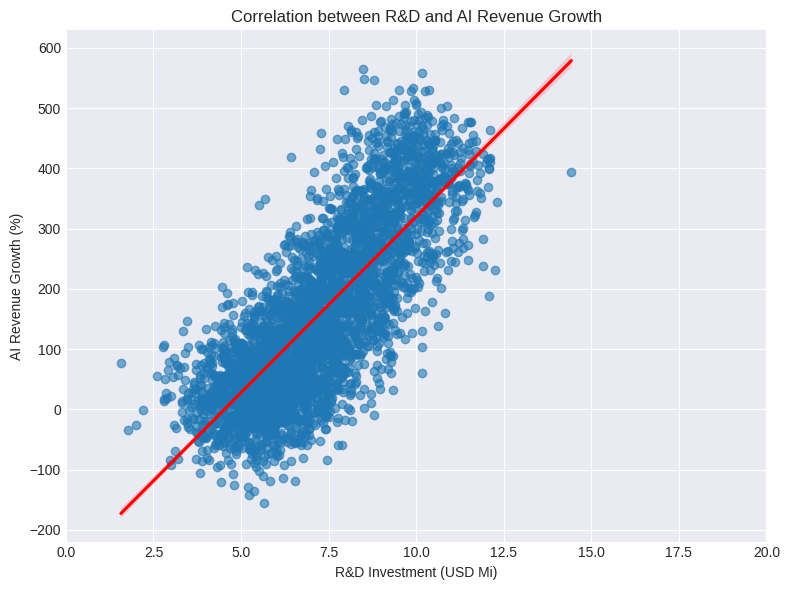

In [26]:
df_filtered = df[df['r&d_spending_usd_mn'] <= 20]

plt.figure(figsize=(8, 6))
sns.regplot(
    x='r&d_spending_usd_mn',
    y='ai_revenue_growth_%',
    data=df_filtered,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title("Correlation between R&D and AI Revenue Growth")
plt.xlabel("R&D Investment (USD Mi)")
plt.ylabel("AI Revenue Growth (%)")
plt.xlim(0, 20)
plt.tight_layout()
plt.show()



1.   **Clear correlation and linear positive interaction between R&D investment and AI revenue growth**



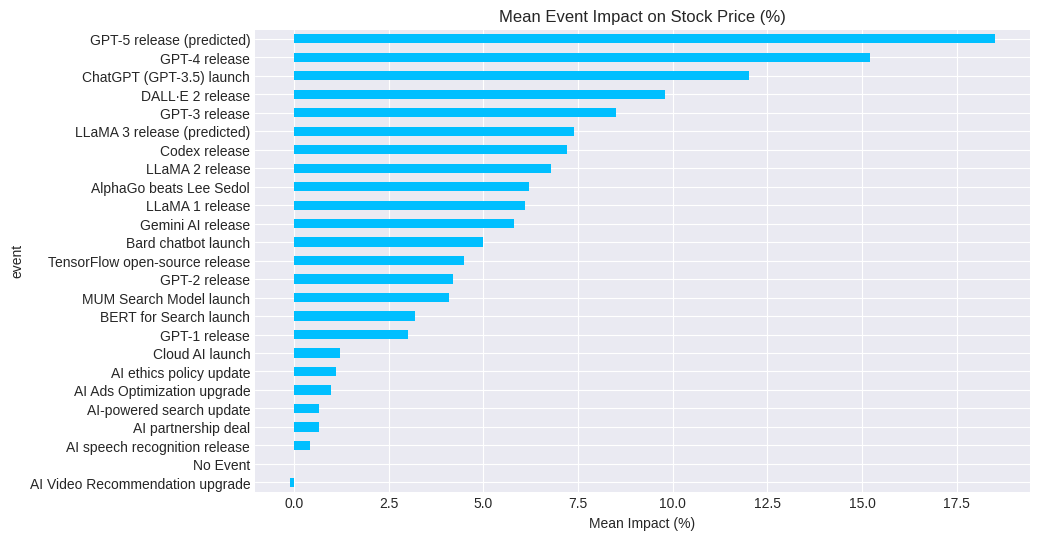

In [27]:
event_impact = df.groupby('event')['stock_impact_%'].mean().sort_values()

event_impact.plot(kind='barh', figsize=(10, 6), color='deepskyblue')
plt.title("Mean Event Impact on Stock Price (%)")
plt.xlabel("Mean Impact (%)")
plt.show()



*   **ChatGPT related events are more impactful for stocks**



In [28]:
df['event'].unique()

array(['No Event', 'Cloud AI launch', 'AI ethics policy update',
       'AI-powered search update', 'AI Ads Optimization upgrade',
       'AI partnership deal', 'AI Video Recommendation upgrade',
       'AI speech recognition release', 'GPT-1 release', 'GPT-2 release',
       'GPT-3 release', 'Codex release', 'DALL·E 2 release',
       'ChatGPT (GPT-3.5) launch', 'GPT-4 release',
       'GPT-5 release (predicted)', 'TensorFlow open-source release',
       'AlphaGo beats Lee Sedol', 'BERT for Search launch',
       'MUM Search Model launch', 'Bard chatbot launch',
       'Gemini AI release', 'LLaMA 1 release', 'LLaMA 2 release',
       'LLaMA 3 release (predicted)'], dtype=object)

In [29]:
#event grouping
def group_event(event):
    if event == 'No Event':
        return 'None'
    elif event in ['GPT-1 release', 'GPT-2 release', 'GPT-3 release', 'ChatGPT (GPT-3.5) launch', 'GPT-4 release', 'GPT-5 release (predicted)']:
        return 'GPT Models'
    elif event in ['LLaMA 1 release', 'LLaMA 2 release', 'LLaMA 3 release (predicted)']:
        return 'LLaMA Models'
    elif event in ['Bard chatbot launch', 'Gemini AI release']:
        return 'Google Chatbots'
    elif event in ['AI-powered search update', 'BERT for Search launch', 'MUM Search Model launch']:
        return 'Seach'
    elif event in ['AI Ads Optimization upgrade']:
        return 'Marketing'
    elif event in ['AI Video Recommendation upgrade', 'AI speech recognition release']:
        return 'Media'
    elif event in ['AI ethics policy update']:
        return 'Etical Politics'
    elif event in ['AI partnership deal']:
        return 'Partnerships'
    elif event in ['Codex release', 'DALL·E 2 release', 'TensorFlow open-source release', 'AlphaGo beats Lee Sedol']:
        return 'Other Models'
    elif event == 'Cloud AI launch':
        return 'Infrastructure'
    else:
        return 'Other'

df['event_group'] = df['event'].apply(group_event)

In [41]:
df['event_group'].value_counts()

,count
event_group,
None,10726
Media,66
Seach,34
Marketing,32
Partnerships,32
Etical Politics,27
Infrastructure,27
GPT Models,6
Other Models,4


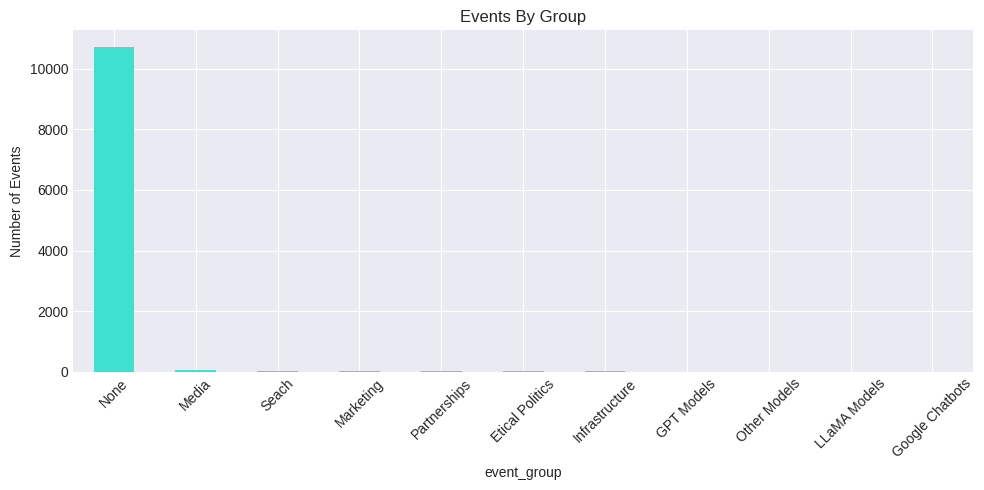

In [30]:
df['event_group'].value_counts().plot.bar(figsize=(10, 5), color='turquoise')
plt.title("Events By Group")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
event_returns = df.groupby('event_group')['stock_impact_%'].mean().sort_values(ascending=False)

print('Mean retun by', event_returns)

Mean retun by event_group
GPT Models         10.233333
Other Models        6.925000
LLaMA Models        6.766667
Google Chatbots     5.400000
Infrastructure      1.215185
Etical Politics     1.111852
Marketing           0.983125
Seach               0.849118
Partnerships        0.666562
Media               0.200909
None                0.000201
Name: stock_impact_%, dtype: float64


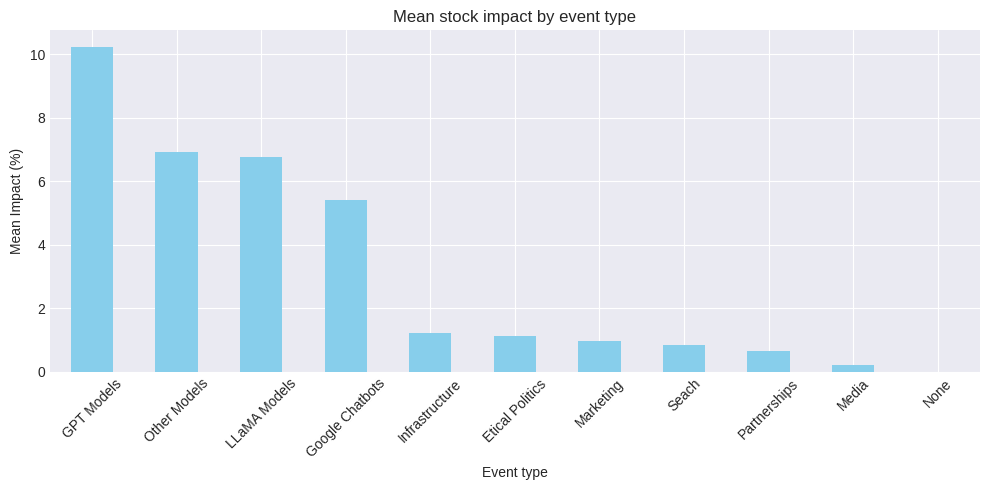

In [43]:
event_returns.plot.bar(figsize=(10, 5), color='skyblue')
plt.title("Mean stock impact by event type")
plt.ylabel("Mean Impact (%)")
plt.xlabel("Event type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   **GPT outstanding impact confirmed**

In [52]:
df_positive = df[df['stock_impact_%'] > 0]

df_negative = df[df['stock_impact_%'] < 0]

positive_returns = df_positive.groupby('event_group')['stock_impact_%'].mean().sort_values(ascending=False)
print(" Positive impact:")
print(positive_returns)

negative_returns = df_negative.groupby('event_group')['stock_impact_%'].mean().sort_values()
print("\n Negative impact:")
print(negative_returns)

 Positive impact:
event_group
GPT Models         10.233333
Other Models        6.925000
LLaMA Models        6.766667
Google Chatbots     5.400000
Infrastructure      3.004118
Etical Politics     2.963125
Marketing           2.509500
Seach               2.450000
Partnerships        2.388947
Media               2.117742
None                0.505572
Name: stock_impact_%, dtype: float64

 Negative impact:
event_group
Partnerships      -1.850769
Infrastructure    -1.826000
Seach             -1.736923
Etical Politics   -1.580909
Marketing         -1.560833
Media             -1.496857
None              -0.501580
Name: stock_impact_%, dtype: float64


*   **Some event types cause negative impact on stocks**


In [50]:
df_positive = df[df['stock_impact_%'] > 0]

df_negative = df[df['stock_impact_%'] < 0]

positive_returns = df_positive.groupby('event')['stock_impact_%'].mean().sort_values(ascending=False)
print(" Positive impact:")
print(positive_returns)

negative_returns = df_negative.groupby('event')['stock_impact_%'].mean().sort_values()
print("\n Negative impact:")
print(negative_returns)

 Positive impact:
event
GPT-5 release (predicted)          18.500000
GPT-4 release                      15.200000
ChatGPT (GPT-3.5) launch           12.000000
DALL·E 2 release                    9.800000
GPT-3 release                       8.500000
LLaMA 3 release (predicted)         7.400000
Codex release                       7.200000
LLaMA 2 release                     6.800000
AlphaGo beats Lee Sedol             6.200000
LLaMA 1 release                     6.100000
Gemini AI release                   5.800000
Bard chatbot launch                 5.000000
TensorFlow open-source release      4.500000
GPT-2 release                       4.200000
MUM Search Model launch             4.100000
BERT for Search launch              3.200000
Cloud AI launch                     3.004118
GPT-1 release                       3.000000
AI ethics policy update             2.963125
AI Ads Optimization upgrade         2.509500
AI partnership deal                 2.388947
AI-powered search update       



*   **'No event' has equally negativa and positive impact**
*   **AI models and chatbot releases have exclusively positive impact. All other event types can have both positive and negative impact.**



In [48]:
df_positive = df[df['stock_impact_%'] > 0]
positive_events = set(df_positive['event'].dropna().unique())

df_negative = df[df['stock_impact_%'] < 0]
negative_events = set(df_negative['event'].dropna().unique())

exclusive_positive_events = positive_events - negative_events

exclusive_positive_df = df_positive[df_positive['event'].isin(exclusive_positive_events)]

exclusive_positive_returns = exclusive_positive_df.groupby('event')['stock_impact_%'].mean().sort_values(ascending=False)

print("Events that cause exclusively positive impact:")
print(exclusive_positive_returns)

Events that cause exclusively positive impact:
event
GPT-5 release (predicted)         18.5
GPT-4 release                     15.2
ChatGPT (GPT-3.5) launch          12.0
DALL·E 2 release                   9.8
GPT-3 release                      8.5
LLaMA 3 release (predicted)        7.4
Codex release                      7.2
LLaMA 2 release                    6.8
AlphaGo beats Lee Sedol            6.2
LLaMA 1 release                    6.1
Gemini AI release                  5.8
Bard chatbot launch                5.0
TensorFlow open-source release     4.5
GPT-2 release                      4.2
MUM Search Model launch            4.1
BERT for Search launch             3.2
GPT-1 release                      3.0
Name: stock_impact_%, dtype: float64


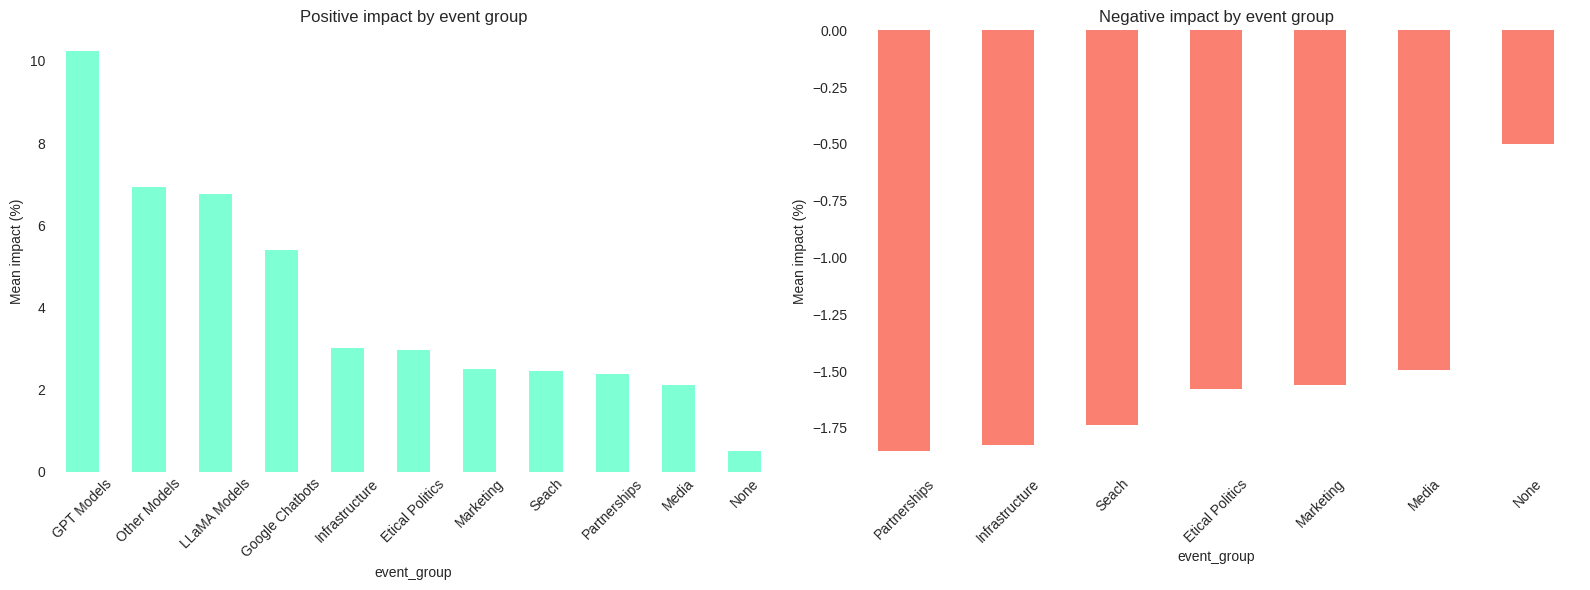

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = positive_returns.plot.bar(ax=axes[0], color='aquamarine')

ax.set_facecolor('white')
ax.figure.set_facecolor('white')
ax.grid(False)

axes[0].set_title("Positive impact by event group")
axes[0].set_ylabel("Mean impact (%)")
axes[0].tick_params(axis='x', rotation=45)

ax = negative_returns.plot.bar(ax=axes[1], color='salmon')

ax.set_facecolor('white')
ax.figure.set_facecolor('white')
ax.grid(False)

axes[1].set_title("Negative impact by event group")
axes[1].set_ylabel("Mean impact (%)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

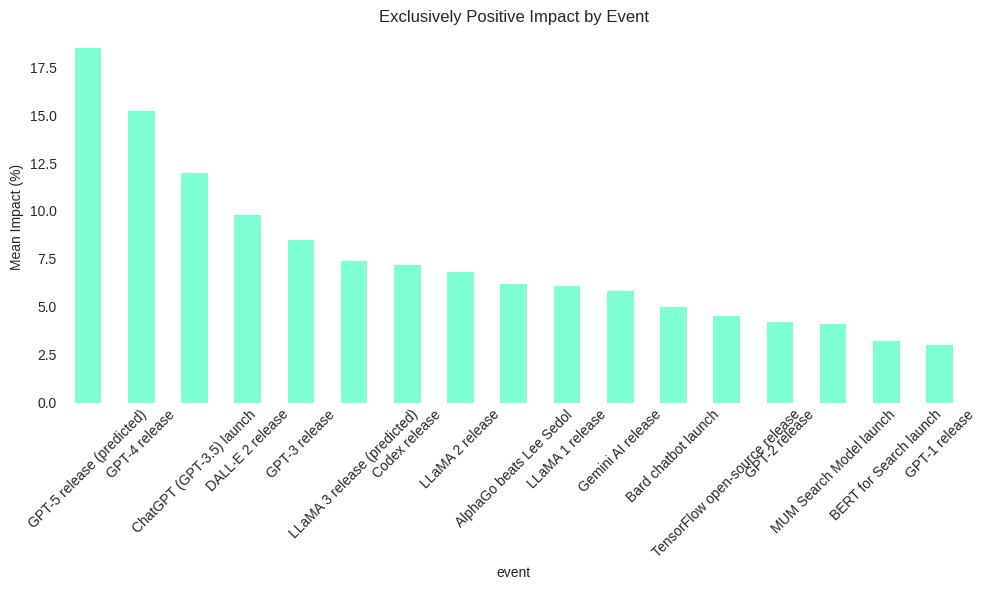

In [60]:
plt.figure(figsize=(10, 6))

ax = exclusive_positive_returns.plot.bar(color='aquamarine')

ax.set_facecolor('white')
ax.figure.set_facecolor('white')
ax.grid(False)


ax.set_title("Exclusively Positive Impact by Event")
ax.set_ylabel("Mean Impact (%)")
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

*   **AI models and chatbot releases have exclusively positive impact.**

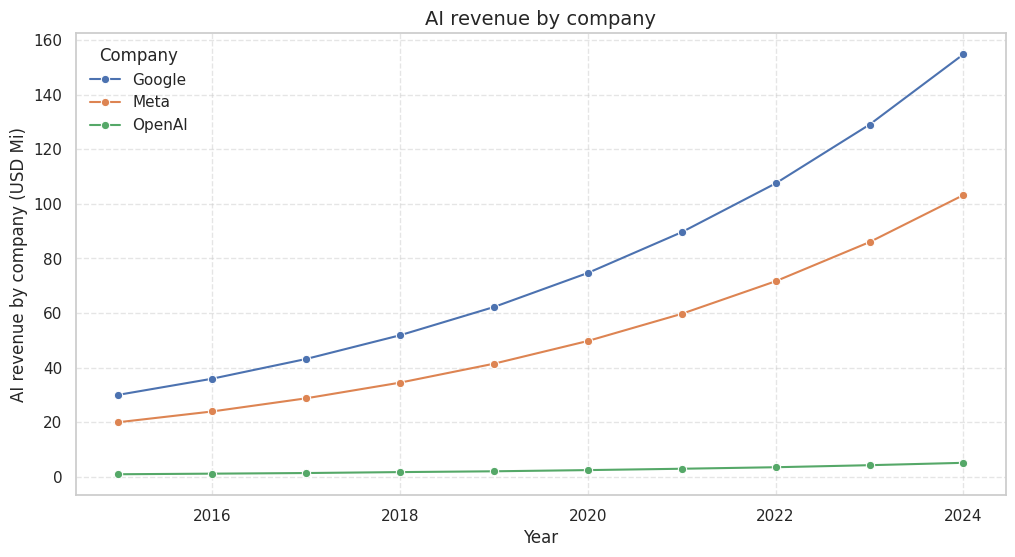

In [81]:
df_yearly = df.groupby(["year", "company"], as_index=False)["ai_revenue_usd_mn"].mean()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_yearly,
    x="year",
    y="ai_revenue_usd_mn",
    hue="company",
    marker="o"
)

plt.title("AI revenue by company", fontsize=14)
plt.xlabel("Year")
plt.ylabel("AI revenue by company (USD Mi)")
plt.legend(title="Company")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



*   **Even though OpenAI events cause more positive impact on stocks, Google and Meta are generating more revenue from AI**



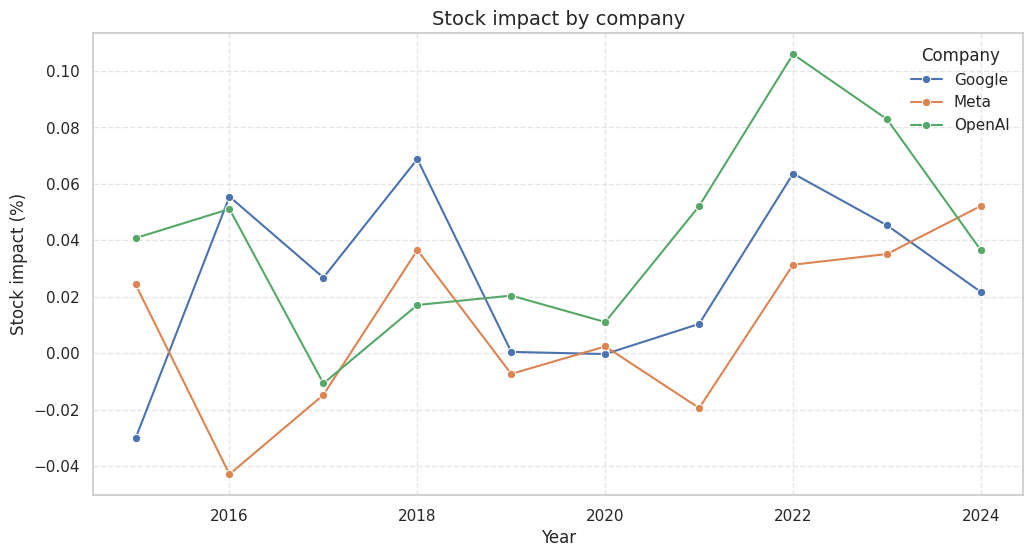

In [82]:
df_yearly = df.groupby(["year", "company"], as_index=False)["stock_impact_%"].mean()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_yearly,
    x="year",
    y="stock_impact_%",
    hue="company",
    marker="o"
)

plt.title("Stock impact by company", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Stock impact (%)")
plt.legend(title="Company")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

*   **In 2022 ChatGPT release increased OpenAI stock impact**
*   **Currently the stocks of all 3 companies are competitive. Since 2022 other companies raced to implement their own LLM models**